In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Read Data

In [5]:
data = pd.read_csv(r"C:\Users\happp\Documents\2024_ScienceFair_Mirror\GoodData\Red_Blue.csv")

Data View

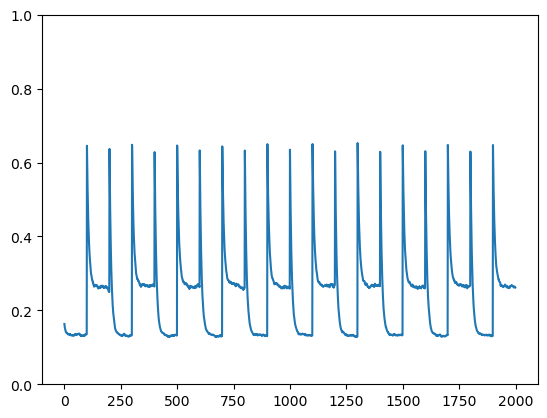

In [6]:
values = data["Value"].values

plt.ylim(0, 1)
plt.plot(range(len(values)), values)
plt.show()